## Homework #6.2 - Feature Engineering

### Overview:
Feature engineering refers to using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive
model using machine learning or statistical modeling.

### Task:
For this chapter, you will have to do the following:
* Using Feature Engineering try the algorithms you discovered and
apply them to the previous Data Sets.


In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imperio import BoxCoxTransformer, ZCATransformer, FrequencyImputationTransformer, TargetImputationTransformer
from sklearn.datasets import load_iris, load_diabetes
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

I decided to work with several datasets to cover bot Numerical and Categorical Feature Engineering Techniques:
1. Iris dataset
2. Titanic dataset
3. Telco Customer Churn dataset
4. Pima Indian Disease dataset

In [144]:
iris_dataset: pd.DataFrame = load_iris(as_frame=True).frame

In [145]:
iris_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [146]:
iris_dataset.head(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [147]:
iris_dataset.tail(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### Feature Scaling
This technique is primarily used to bring numerical data of different features in comparable ranges and at comparable scale. There are 2 main algorithms that offers this
possibility:
1. Normalization - (a.k.a. Min-Max Scaling) is the process of bringing
all features values between 0 and 1. This can be achieved by subtracting
the min vector (the vector with the smallest values in each column) from
the feature vector. This result then is divided by the difference between
the max vector (the vector with the biggest values in each column) and
the min vector, or just by applying the following formula:
$$
x^{'} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$
2. Standardization - is the process of bringing the data between -3 and
3 or, saying in another way bringing the numerical series to a series with
the mean equal to 0 and standard deviation equal to 1. This is done by
applying the following formula:
$$
x^{'} = \frac{x-\mu}{\sigma}
$$

As it may be seen

In [148]:
iris_dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


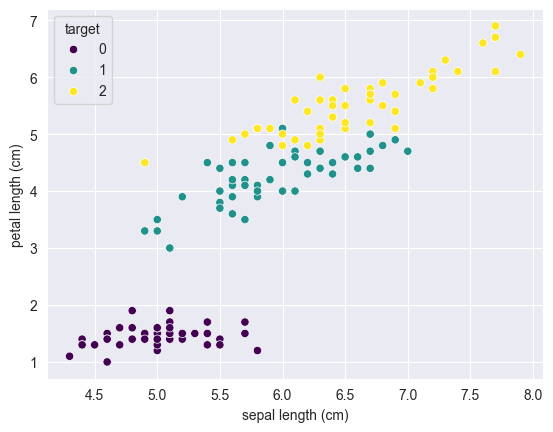

In [149]:
plt.figure()
sns.scatterplot(data=iris_dataset, x=iris_dataset["sepal length (cm)"], y=iris_dataset["petal length (cm)"], hue="target", palette="viridis")
plt.show()

In [150]:
X_iris_features, y_iris_target = iris_dataset.drop(["target"], axis=1), iris_dataset["target"]

In [151]:
X_iris_features

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [152]:
y_iris_target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [153]:
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris_features, y_iris_target, test_size=.3, random_state=42)

#### Normalization

In [154]:
min_max_scaler = MinMaxScaler()
X_iris_train_normalized = pd.DataFrame(data=min_max_scaler.fit_transform(X=X_iris_train), columns=X_iris_features.columns)
X_iris_train_normalized

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.352941,0.181818,0.464286,0.375000
1,0.588235,0.363636,0.714286,0.583333
2,0.617647,0.500000,0.785714,0.708333
3,0.676471,0.454545,0.589286,0.541667
4,0.852941,0.727273,0.892857,1.000000
...,...,...,...,...
100,0.529412,0.363636,0.517857,0.500000
101,0.176471,0.227273,0.607143,0.666667
102,0.441176,0.909091,0.017857,0.041667
103,0.441176,0.272727,0.517857,0.458333


In [155]:
X_iris_train_normalized.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,105.000000,105.000000,105.000000,105.000000
mean,0.453782,0.458874,0.494728,0.474603
std,0.245089,0.190414,0.307385,0.309467
min,0.000000,0.000000,0.000000,0.000000
25%,0.235294,0.363636,0.107143,0.125000
50%,0.441176,0.454545,0.571429,0.500000
75%,0.617647,0.590909,0.714286,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [156]:
X_iris_test_normalized = pd.DataFrame(data=min_max_scaler.transform(X=X_iris_test), columns=X_iris_features.columns)
X_iris_test_normalized

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.529412,0.363636,0.642857,0.458333
1,0.411765,0.818182,0.107143,0.083333
2,1.000000,0.272727,1.035714,0.916667
3,0.500000,0.409091,0.607143,0.583333
4,0.735294,0.363636,0.660714,0.541667
5,0.323529,0.636364,0.071429,0.125000
6,0.382353,0.409091,0.446429,0.500000
7,0.764706,0.500000,0.714286,0.916667
8,0.558824,0.090909,0.607143,0.583333
9,0.441176,0.318182,0.500000,0.458333


In [157]:
X_iris_test_normalized.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,45.000000,45.000000,45.000000,45.000000
mean,0.454248,0.531313,0.427778,0.419444
std,0.242662,0.208484,0.331615,0.336209
min,0.029412,0.090909,-0.017857,0.000000
25%,0.264706,0.363636,0.071429,0.041667
50%,0.441176,0.500000,0.589286,0.500000
75%,0.617647,0.636364,0.696429,0.708333
max,1.058824,1.090909,1.035714,0.916667


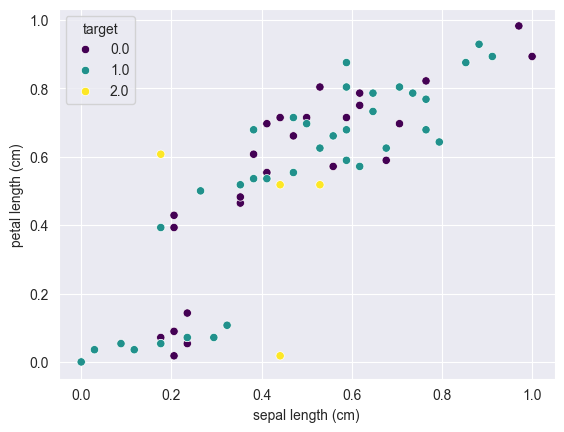

In [158]:
plt.figure()
sns.scatterplot(x=X_iris_train_normalized["sepal length (cm)"], y=X_iris_train_normalized["petal length (cm)"], hue=y_iris_train, palette="viridis")
plt.show()

<Figure size 640x480 with 0 Axes>

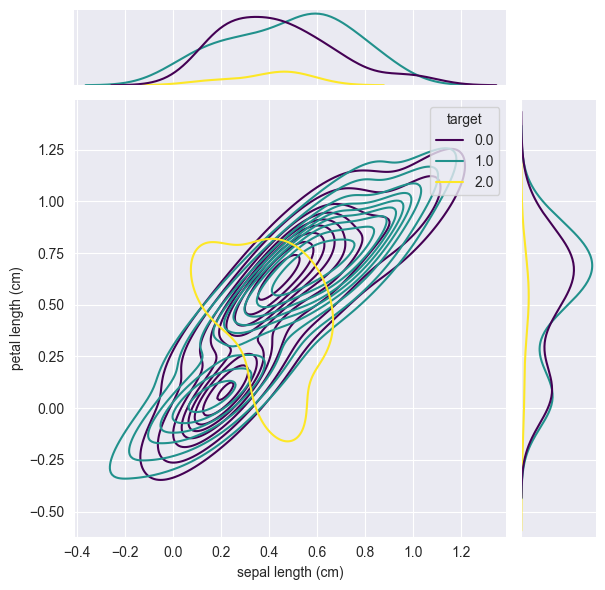

In [159]:
plt.figure()
sns.jointplot(x=X_iris_train_normalized["sepal length (cm)"], y=X_iris_train_normalized["petal length (cm)"], hue=y_iris_train, palette="viridis", kind="kde")
plt.show()

<Figure size 640x480 with 0 Axes>

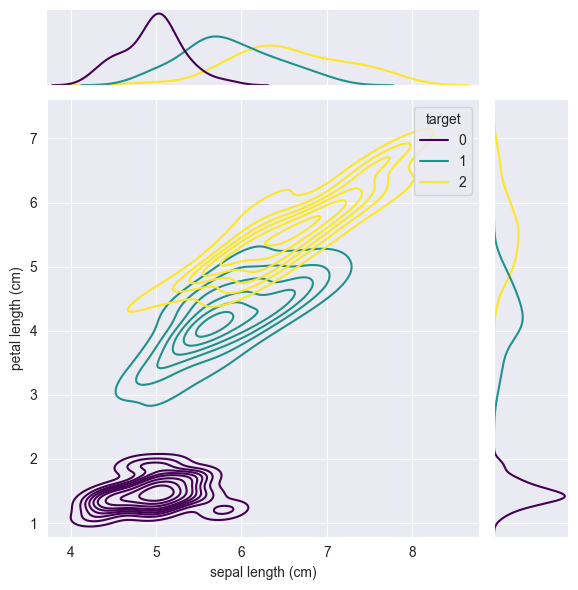

In [160]:
plt.figure()
sns.jointplot(x=X_iris_train["sepal length (cm)"], y=X_iris_train["petal length (cm)"], hue=y_iris_train, palette="viridis", kind="kde")
plt.show()

#### Standardization

In [161]:
standard_scaler = StandardScaler()
X_iris_train_standardized = pd.DataFrame(data=standard_scaler.fit_transform(X=X_iris_train), columns=X_iris_features.columns)
X_iris_train_standardized

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.413416,-1.462003,-0.099511,-0.323398
1,0.551222,-0.502563,0.717703,0.353032
2,0.671802,0.217016,0.951192,0.758890
3,0.912961,-0.022844,0.309096,0.217746
4,1.636440,1.416315,1.301427,1.705891
...,...,...,...,...
100,0.310062,-0.502563,0.075606,0.082460
101,-1.136895,-1.222143,0.367468,0.623604
102,-0.051677,2.375755,-1.558821,-1.405685
103,-0.051677,-0.982283,0.075606,-0.052826


In [162]:
X_iris_train_standardized.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,3.679596e-16,9.198991e-17,5.286776e-17,1.099649e-16
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.860374e+00,-2.421442e+00,-1.617194e+00,-1.540971e+00
25%,-8.957355e-01,-5.025635e-01,-1.266959e+00,-1.135113e+00
50%,-5.167705e-02,-2.284379e-02,2.507234e-01,8.245999e-02
75%,6.718016e-01,6.967357e-01,7.177026e-01,7.588896e-01
max,2.239339e+00,2.855474e+00,1.651661e+00,1.705891e+00


In [163]:
X_iris_test_standardized = pd.DataFrame(data=standard_scaler.transform(X=X_iris_test), columns=X_iris_features.columns)
X_iris_test_standardized

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.310062,-0.502563,0.484213,-0.052826
1,-0.172257,1.896035,-1.266959,-1.270399
2,2.239339,-0.982283,1.768406,1.435319
3,0.189483,-0.262704,0.367468,0.353032
4,1.154121,-0.502563,0.542585,0.217746
5,-0.533996,0.936596,-1.383704,-1.135113
6,-0.292837,-0.262704,-0.157883,0.082460
7,1.274701,0.217016,0.717703,1.435319
8,0.430642,-1.941723,0.367468,0.353032
9,-0.051677,-0.742423,0.017234,-0.052826


In [164]:
X_iris_test_standardized.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,45.000000,45.000000,45.000000,45.000000
mean,0.001914,0.382253,-0.218850,-0.179093
std,0.994843,1.100154,1.084002,1.091625
min,-1.739794,-1.941723,-1.675566,-1.540971
25%,-0.775156,-0.502563,-1.383704,-1.405685
50%,-0.051677,0.217016,0.309096,0.082460
75%,0.671802,0.936596,0.659330,0.758890
max,2.480498,3.335194,1.768406,1.435319


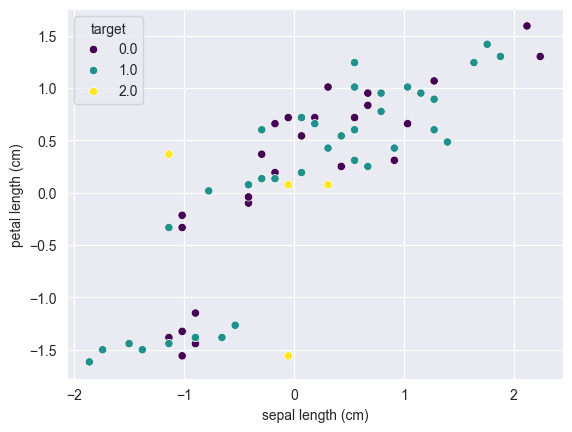

In [165]:
plt.figure()

sns.scatterplot(x=X_iris_train_standardized["sepal length (cm)"], y=X_iris_train_standardized["petal length (cm)"], hue=y_iris_train, palette="viridis")

plt.show()

<Figure size 640x480 with 0 Axes>

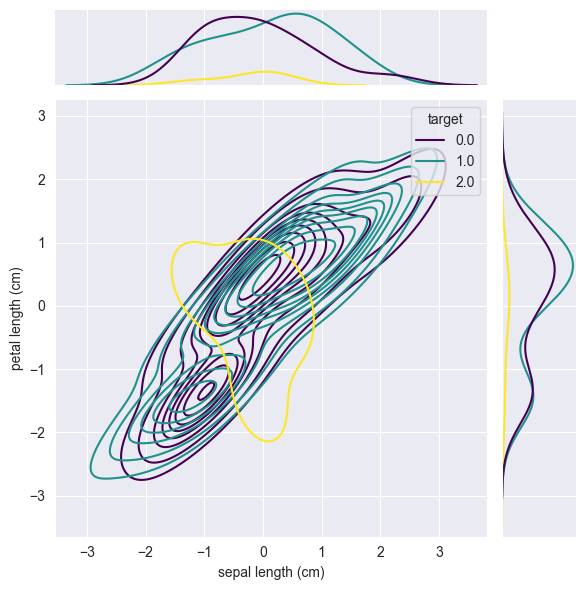

In [166]:
plt.figure()
sns.jointplot(x=X_iris_train_standardized["sepal length (cm)"], y=X_iris_train_standardized["petal length (cm)"], hue=y_iris_train, palette="viridis", kind="kde")
plt.show()

<Figure size 640x480 with 0 Axes>

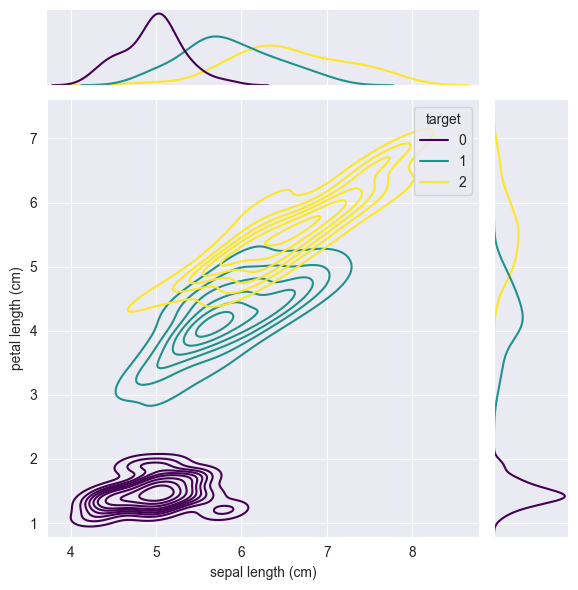

In [167]:
plt.figure()
sns.jointplot(x=X_iris_train["sepal length (cm)"], y=X_iris_train["petal length (cm)"], hue=y_iris_train, palette="viridis", kind="kde")
plt.show()

### Dummy Variable
Dummy Variable (a.k.a. Indicator Variable) is an artificial variable
created to represent an attribute with two or more categories.

Dummy Variable means creating a separate binary column for every
category in the categorical feature. In these columns, we have 1 when
the respective column name is equal to the respective categorical value,
as shown below:
<center>

| Gender | Gender_Male | Gender_Female |
|:------:|:-----------:|:-------------:|
|  Male  |      1      |       0       |
| Female |      0      |       1       |

</center>

But the problem is that if we keep both of the freshly added columns, we break the Regression observation that features should be independent of each other. By the fact that we have
a feature "Gender_Male" we can assure that the example is not a Female, which is affecting the next feature: "Gender_Female", they can't be both 1 or 0 at the same time. This, more
generally, is called "dummy trap" - occurs when one or more dummy variables are redundant, meaning they can be predicted from the other variables, and, thus, bringing multi
collinearity to the dataset. Therefore, we should add $(n-1)$ dummy variables, like this:

<center>

| Gender | Gender_Male |
|:------:|:-----------:|
|  Male  |      1      |
| Female |      0      |

</center>

In [168]:
telco_dataset: pd.DataFrame = pd.read_csv("dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
telco_dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [169]:
telco_dataset.drop(columns=['customerID'], axis=1, inplace=True)
telco_dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [170]:
telco_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [171]:
telco_dataset.select_dtypes(include=['object']).describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [172]:
object_cols = telco_dataset.select_dtypes(include=['object']).columns.difference(["TotalCharges", "Churn"])

unique_values = {col: telco_dataset[col].unique() for col in object_cols}

for col, values in unique_values.items():
    print(f"Unique values in '{col}': {values}")

Unique values in 'Contract': ['Month-to-month' 'One year' 'Two year']
Unique values in 'Dependents': ['No' 'Yes']
Unique values in 'DeviceProtection': ['No' 'Yes' 'No internet service']
Unique values in 'InternetService': ['DSL' 'Fiber optic' 'No']
Unique values in 'MultipleLines': ['No phone service' 'No' 'Yes']
Unique values in 'OnlineBackup': ['Yes' 'No' 'No internet service']
Unique values in 'OnlineSecurity': ['No' 'Yes' 'No internet service']
Unique values in 'PaperlessBilling': ['Yes' 'No']
Unique values in 'Partner': ['Yes' 'No']
Unique values in 'PaymentMethod': ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Unique values in 'PhoneService': ['No' 'Yes']
Unique values in 'StreamingMovies': ['No' 'Yes' 'No internet service']
Unique values in 'StreamingTV': ['No' 'Yes' 'No internet service']
Unique values in 'TechSupport': ['No' 'Yes' 'No internet service']
Unique values in 'gender': ['Female' 'Male']


In [173]:
dummy_variables_telco_dataset = pd.get_dummies(data=telco_dataset, columns=object_cols, drop_first=True, dtype=int)
dummy_variables_telco_dataset["Churn"] = dummy_variables_telco_dataset['Churn'].map({"No": 0, "Yes": 1})
dummy_variables_telco_dataset

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Contract_One year,Contract_Two year,Dependents_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,PhoneService_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_Yes,gender_Male
0,0,1,29.85,29.85,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,34,56.95,1889.5,0,1,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,0,2,70.70,151.65,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.5,0,1,0,1,0,1,...,0,1,1,0,1,0,1,0,1,1
7039,0,72,103.20,7362.9,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
7040,0,11,29.60,346.45,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7041,1,4,74.40,306.6,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [174]:
dummy_variables_telco_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   object 
 4   Churn                                  7043 non-null   int64  
 5   Contract_One year                      7043 non-null   int64  
 6   Contract_Two year                      7043 non-null   int64  
 7   Dependents_Yes                         7043 non-null   int64  
 8   DeviceProtection_No internet service   7043 non-null   int64  
 9   DeviceProtection_Yes                   7043 non-null   int64  
 10  InternetService_Fiber optic            7043 non-null   int64  
 11  Inte

## Advanced Imperio Methods: Numerical Features.

#### Box-Cox Transformer
Box-Cox transformation is a transformation of a non-normal variable
into a normal one. The normality of the data is a fundamental assumption in statistics. From the point of view of statistics, it allows you to
run more statistics tests on the data, while from the Machine Learning
point of view, it will enable algorithms easier to learn. Boc-Cox applies
the following formula to the data:

\begin{equation}
y(\lambda)=
    \begin{cases}
      \frac{y^{\lambda} - 1}{\lambda} \text{,  $\lambda$ $\neq$ 0}\\
      \log(y)\text{,  $\lambda$ $=$ 0}\\
    \end{cases}\
\end{equation}

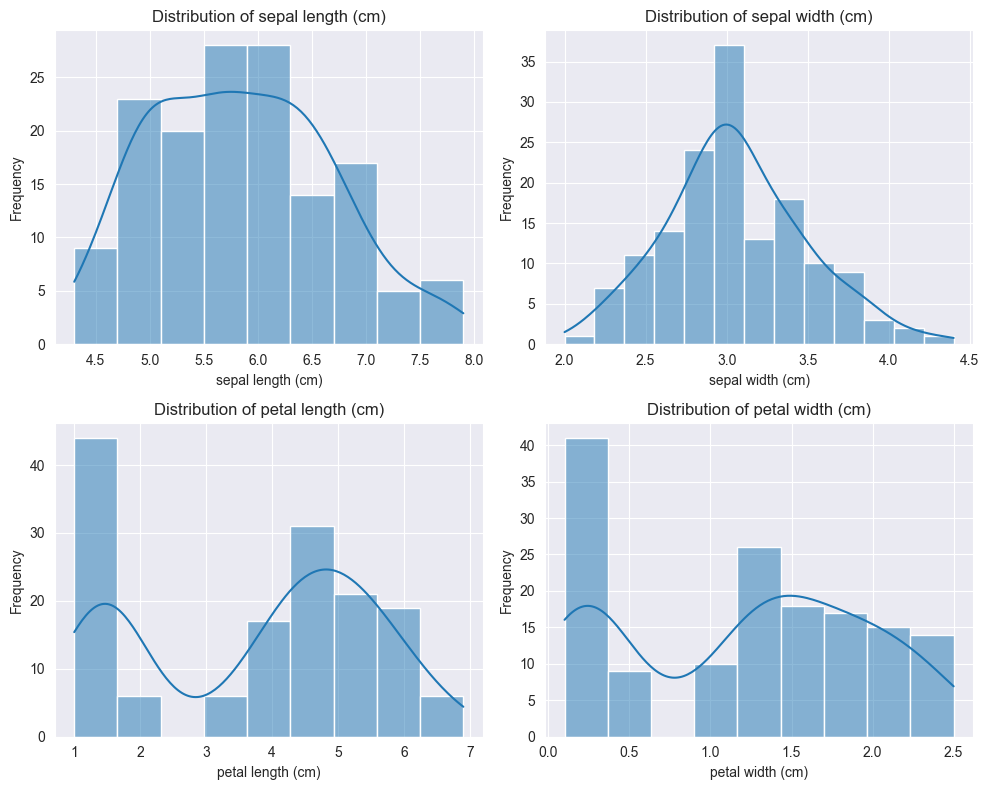

In [175]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes = axes.flatten()

# Plot histograms in each subplot
for ax, feature in zip(axes, iris_dataset.drop(['target'], axis=1)):
    sns.histplot(data=iris_dataset, x=feature, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [176]:
box_cox_transformer = BoxCoxTransformer()
box_cox_transformer.fit(X=X_iris_train, y=y_iris_train)
X_test_iris_box_cox_transformed = pd.DataFrame(data=box_cox_transformer.transform(X_iris_test.to_numpy()), columns=X_iris_train.columns)

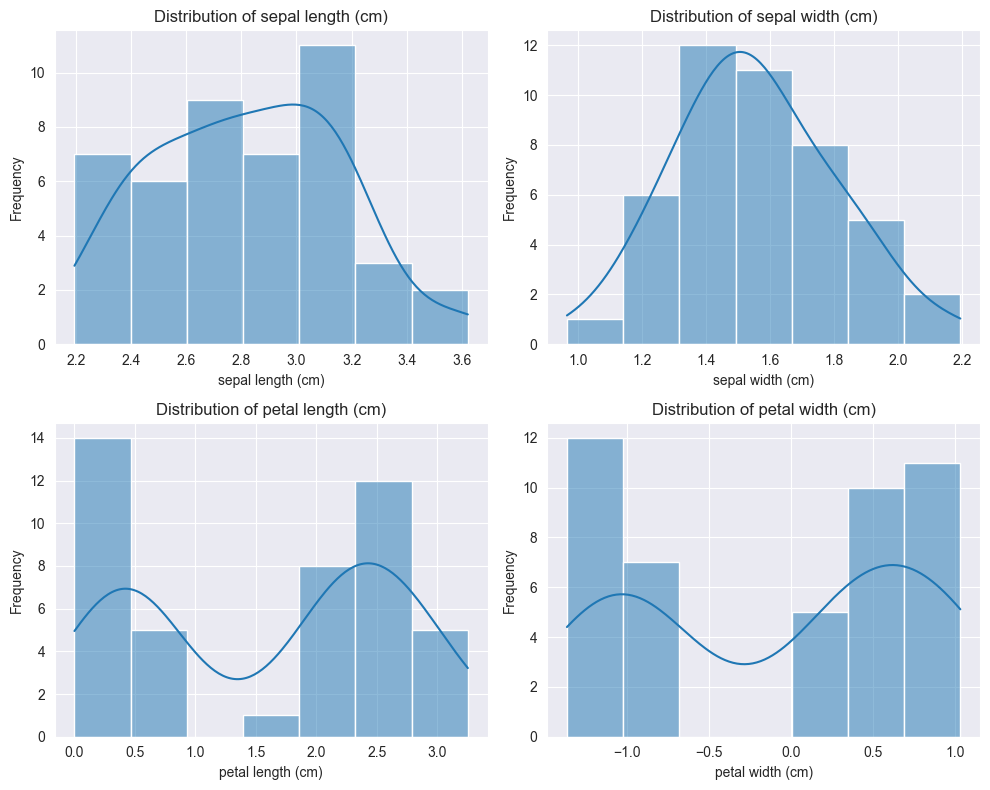

In [177]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

axes = axes.flatten()

# Plot histograms in each subplot
for ax, feature in zip(axes, X_test_iris_box_cox_transformed):
    sns.histplot(data=pd.concat([X_test_iris_box_cox_transformed, y_iris_test], ignore_index=True, sort=False), x=feature, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [178]:
box_cox_transformer = BoxCoxTransformer()
X_train_iris_box_cox_transformer = pd.DataFrame(
    data=box_cox_transformer.fit_transform(X=X_iris_train[["sepal length (cm)", "sepal width (cm)"]].to_numpy(), y=y_iris_train),
    columns=X_iris_train[["sepal length (cm)", "sepal width (cm)"]].columns
)
X_test_iris_box_cox_transformed = pd.DataFrame(
    data=box_cox_transformer.transform(X_iris_test[["sepal length (cm)", "sepal width (cm)"]].to_numpy()),
    columns=X_iris_train[["sepal length (cm)", "sepal width (cm)"]].columns
)

In [179]:
X_test_iris_box_cox_transformed

,sepal length (cm),sepal width (cm)
0,2.939636,1.346640
1,2.774935,1.898718
2,3.549775,1.224903
3,2.898979,1.405877
4,3.215362,1.346640
5,2.647580,1.687818
6,2.732864,1.405877
7,3.253570,1.521363
8,2.979960,0.966479
9,2.816638,1.286335


In [180]:
X_iris_test[["sepal length (cm)", "sepal width (cm)"]]

,sepal length (cm),sepal width (cm)
73,6.1,2.8
18,5.7,3.8
118,7.7,2.6
78,6.0,2.9
76,6.8,2.8
31,5.4,3.4
64,5.6,2.9
141,6.9,3.1
68,6.2,2.2
82,5.8,2.7


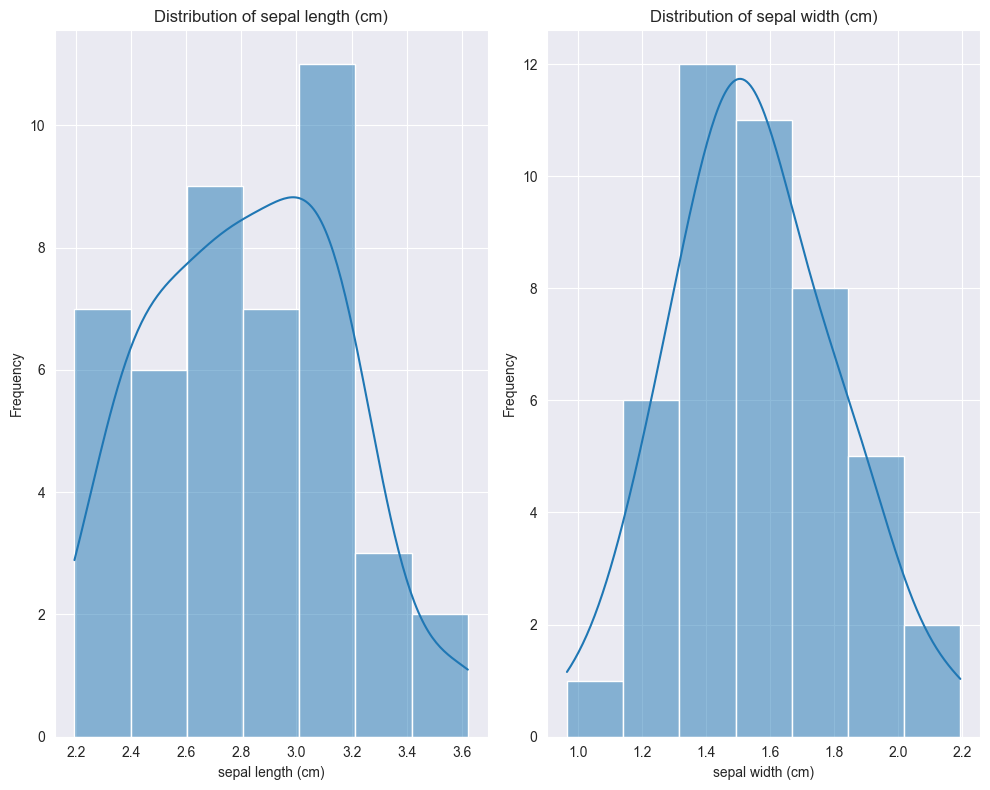

In [181]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

axes = axes.flatten()

# Plot histograms in each subplot
for ax, feature in zip(axes, X_test_iris_box_cox_transformed):
    sns.histplot(data=pd.concat([X_test_iris_box_cox_transformed, y_iris_test], ignore_index=True, sort=False), x=feature, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [182]:
pima_dataset = pd.read_csv("dataset/diabetes.csv")
pima_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [183]:
X_pima_features = pima_dataset.drop(['Outcome'], axis=1)
y_pima_target = pima_dataset['Outcome']

In [184]:
X_pima_train, X_pima_test, y_pima_train, y_pima_test = train_test_split(X_pima_features, y_pima_target, test_size=.3, random_state=42)

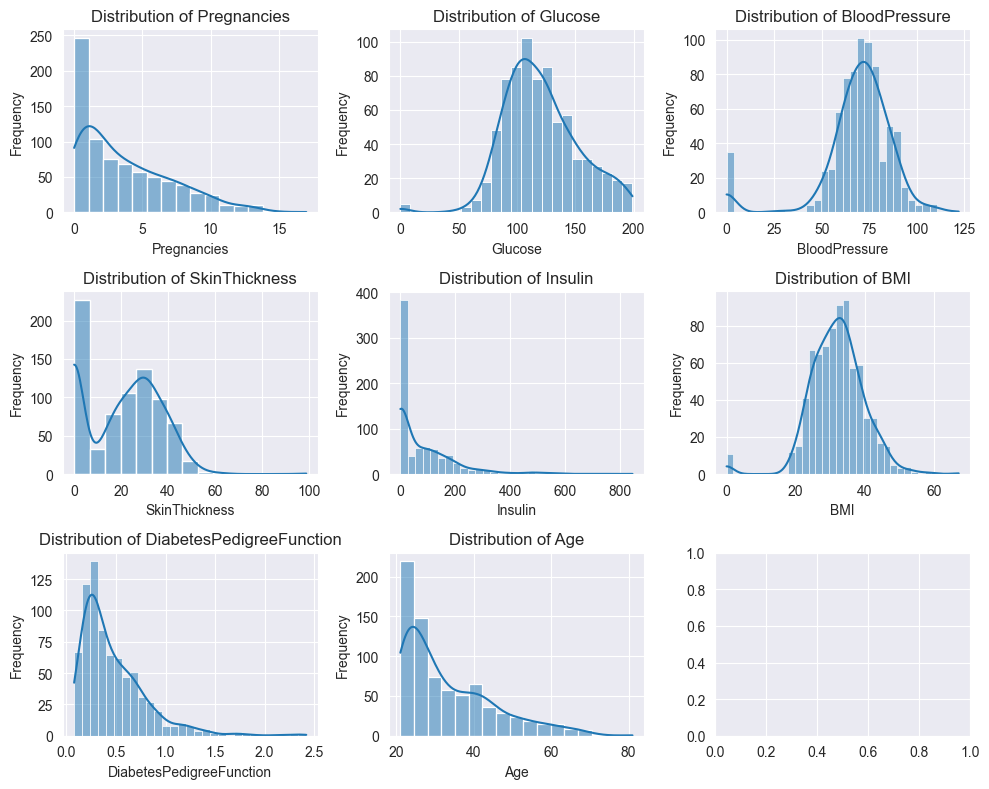

In [185]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

axes = axes.flatten()

# Plot histograms in each subplot
for ax, feature in zip(axes, X_pima_features):
    sns.histplot(data=pima_dataset, x=feature, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [186]:
box_cox_transformer = BoxCoxTransformer()
X_pima_train_box_cox_transformed = pd.DataFrame(data=box_cox_transformer.fit_transform(X=X_pima_train.to_numpy(), y=y_pima_train.to_numpy()), columns=X_pima_test.columns)
X_pima_test_box_cox_transformed = pd.DataFrame(data=box_cox_transformer.transform(X=X_pima_test.to_numpy()), columns=X_pima_test.columns)

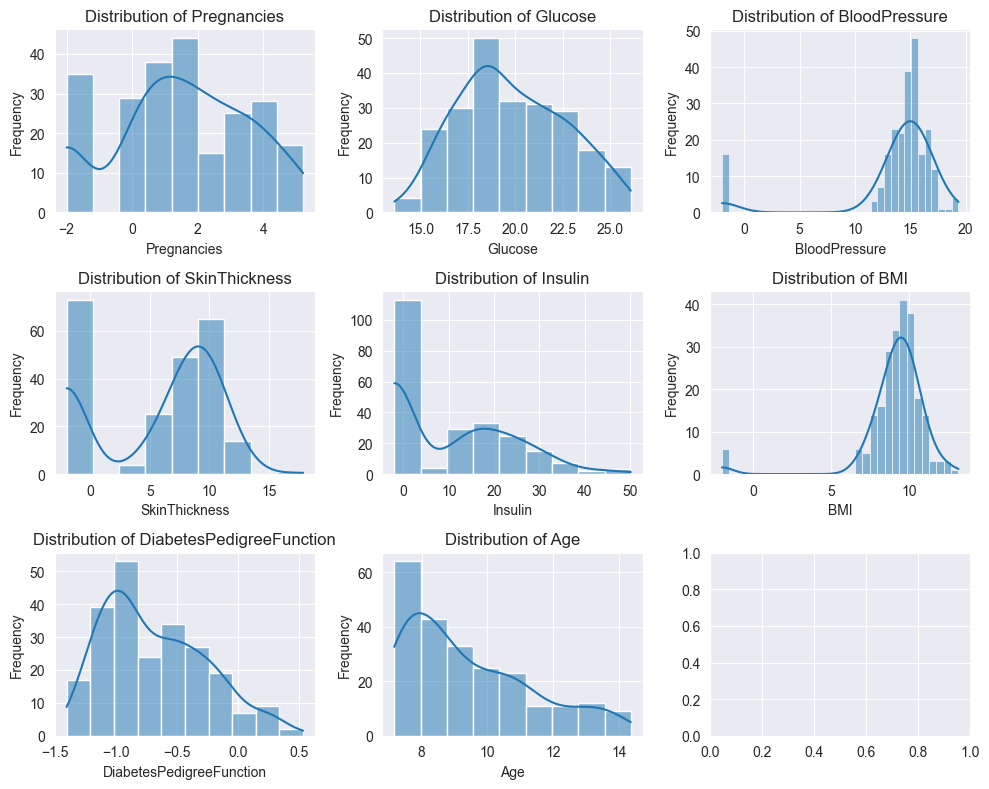

In [187]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

axes = axes.flatten()
# Plot histograms in each subplot
for ax, feature in zip(axes, X_pima_test_box_cox_transformed):
    sns.histplot(data=pd.concat([X_pima_test_box_cox_transformed, y_pima_test], ignore_index=True, sort=False), x=feature, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

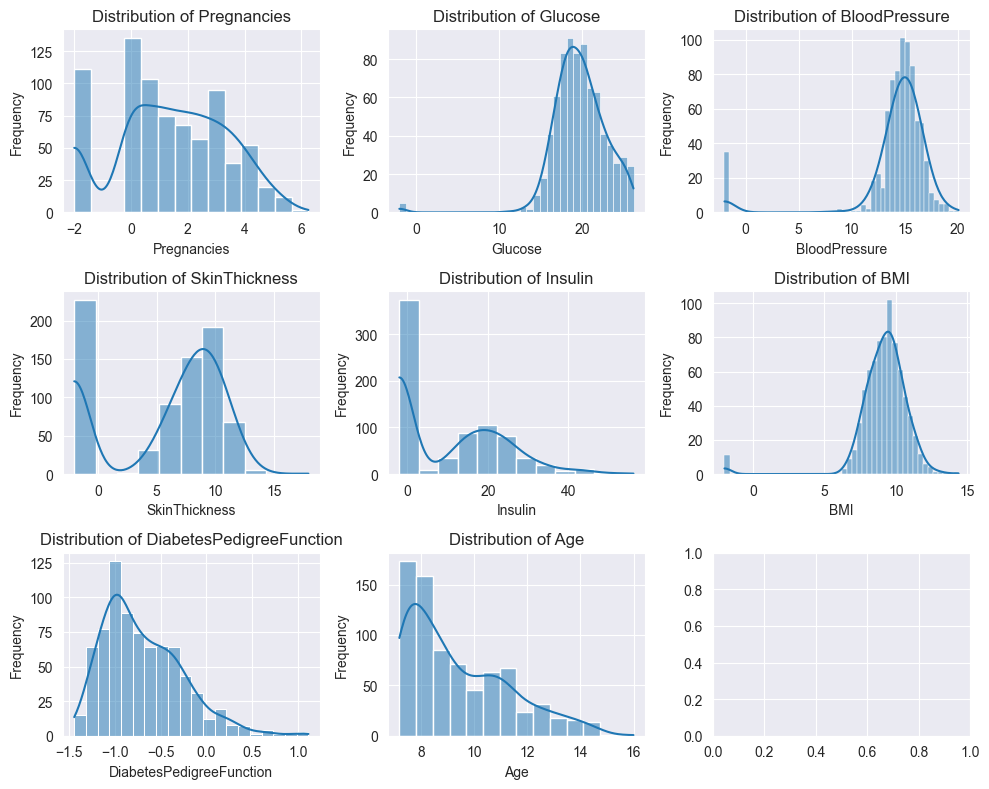

In [188]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 8))

axes = axes.flatten()
X_features_transformed_box_cox = pd.concat([X_pima_train_box_cox_transformed, X_pima_test_box_cox_transformed], ignore_index=True, sort=False)
pima_transformed_box_cox_dataset = pd.concat([X_features_transformed_box_cox, y_pima_target], ignore_index=True, sort=False)
# Plot histograms in each subplot
for ax, feature in zip(axes, X_features_transformed_box_cox):
    sns.histplot(data=pima_transformed_box_cox_dataset, x=feature, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

#### ZCA Transformation

Multi collinearity is a known problem in Data Science. It happens that
in the feature set, some features are interrelated. This is bad because
it reduces the estimated coefficients’ precision, which weakens your regression model’s statistical power. That’s why we would need a way to
escape this situation. And here comes the ZCA transformation.

In [191]:
diabetes_dataset = load_diabetes(as_frame=True).frame

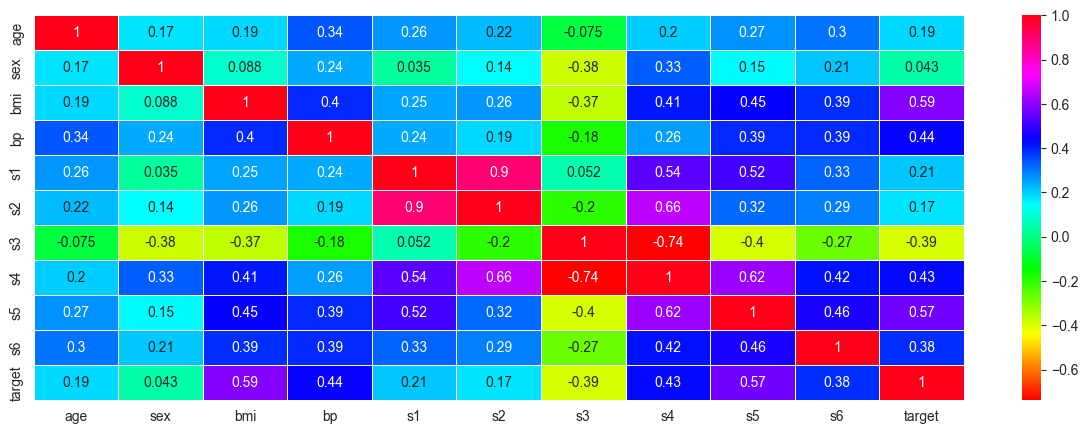

In [192]:
plt.figure(figsize=(15, 5))
sns.heatmap(diabetes_dataset.corr(), annot=True, linewidths=0.5, cbar=True, cmap='hsv')
plt.show()

In [ ]:
zca = ZCATransformer()
X_iris_train_zca = pd.DataFrame(data=zca.fit_transform(X_iris_train.to_numpy(), y_iris_train.to_numpy()), columns=X_iris_train.columns)
X_iris_test_zca = pd.DataFrame(data=zca.transform(X_iris_test.to_numpy()), columns=X_iris_test.columns)

In [ ]:
iris_zca_transformed_dataset = pd.concat(
    [
        pd.concat(
            [
                X_iris_train_zca,
                X_iris_test_zca
            ],
            axis=0,
            ignore_index=True,
            sort=False),
     y_iris_target
    ],
    axis=1,
    ignore_index=True,
    sort=False
)
iris_zca_transformed_dataset.columns = iris_dataset.columns
iris_zca_transformed_dataset

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(iris_zca_transformed_dataset.corr(), annot=True, linewidths=0.5, cbar=True, cmap='hsv')
plt.show()

In [ ]:
iris_zca_transformed_dataset

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def get_logreg_score(X_train, X_test, y_train, y_test):
    logreg = LogisticRegression(max_iter=1000)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    return accuracy_score(y_test, y_pred)